In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()
len(X_train)

60000

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

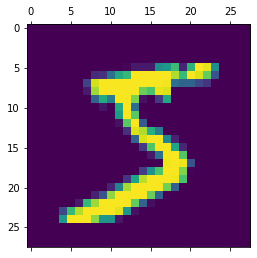

In [5]:
plt.matshow(X_train[0])

### Now we reshape the data(falttening) 

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [12]:
Model= keras.Sequential([
    keras.layers.Dense(100,input_dim=(784),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [13]:
Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
Model.fit(X_train_flattened,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2722 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1246 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0329 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9912: 0s - loss: 0.027
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/

### Evaluate accuracy on test dataset 

In [16]:
Model.evaluate(X_test_flattened,Y_test)


313/313 [==============================] - 2s 3ms/step - loss: 0.0860 - accuracy: 0.9775


[0.08595693111419678, 0.9775000214576721]

### Sample Prediction

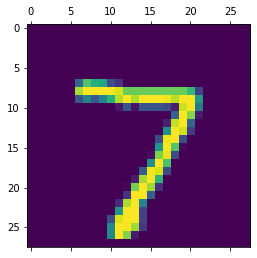

In [17]:
plt.matshow(X_test[0])

In [19]:
Y_predicted=Model.predict(X_test_flattened)
Y_predicted[0]

array([6.9439411e-04, 8.3422054e-07, 1.9806623e-04, 9.4792414e-01,
       5.0313342e-10, 3.8549304e-04, 1.4233418e-09, 9.9999815e-01,
       4.8375398e-02, 8.9998841e-02], dtype=float32)

In [21]:
#so we are not getting the one integer value thats why we use argmax.it will show us the highest value in that array
np.argmax(Y_predicted[0])

7

### Confusion Matrix

In [22]:
Y_predicted_labels=[np.argmax(i) for i in Y_predicted]

In [24]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)

In [25]:
print(cm)

tf.Tensor(
[[ 972    0    1    1    1    2    2    1    0    0]
 [   0 1126    4    1    0    1    2    0    1    0]
 [   4    3 1009    1    1    0    3    5    6    0]
 [   1    0   10  981    0    4    0    2    1   11]
 [   0    0    5    1  955    1    2    3    2   13]
 [   2    1    0    8    1  873    3    1    2    1]
 [   7    3    2    1    4    3  935    0    3    0]
 [   0    5   12    1    1    0    0  997    1   11]
 [   6    0    3    8    4    5    2    3  934    9]
 [   3    3    0    1    4    2    0    2    1  993]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'true values')

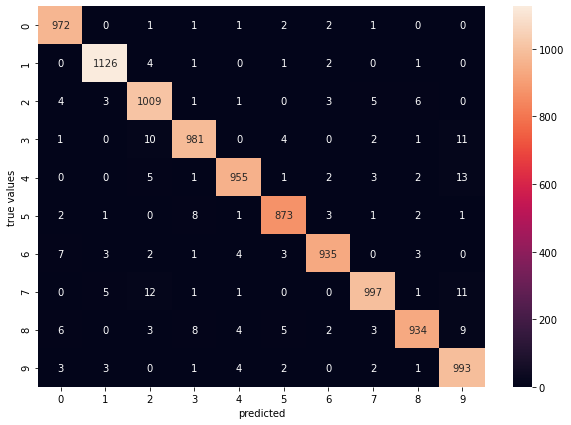

In [26]:
#now visualize
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true values')